# 経営情報各論BⅠ：14．多変量解析(1) 回帰分析
2023/7/11 13:00-14:30

本日の講義では，教師あり学習の回帰について学びます．具体的には，線形単回帰分析と線形重回帰分析を学びます．

## 1. 機械学習
- 機械学習とは，人間が持つ学習能力をコンピュータに持たせることを目指す人工知能の研究分野です．
- コンピュータにデータを解析させることで，データの背後に潜むパターンを発見（学習）させる技術です．
- 発見したパターンを使って，新たなデータが予測できます．
- これにより，手作業では扱えないような大量なデータを高速で処理でき，パターンを発見するための十分なデータが用意できれば，人間が予測するよりも高い精度で予測を行うことができます．
- 音声認識，手書き文字認識，顔画像認識，X線画像・CT画像からの病気の診断，指紋・静脈・虹彩などによる本人識別など，様々な分野で用いられています．
- 自然言語処理のアプリケーションでも，大規模な言語データ（コーパス）が利用可能となっているため，統計的機械翻訳などに広く活用されています．
### 教師あり学習と教師なし学習
- 機械学習の手法は，教師あり学習と教師なし学習の２つに大きく分けられます．（ほかにも，半教師あり学習や強化学習などの手法もあります）
- 教師とは，正解データのこと．例えば，スパムメールを分類する際，パターンを発見するためのデータ（訓練データ）を大量に用意します．そのデータには，そのメールがスパムか通常のメールかの情報（正解データ）を付与しておきます．この正解データ付きの訓練データを解析することで，その特徴を発見し，両者を分けるルールを発見します．
- 正解データの情報を利用する機械学習の手法を教師あり学習といいます．
- 現実には，正解データが得られない場合もあり，そのような場合は，何らかの基準で類似したデータをいくつかのグループに分類します．このように，正解データを利用しない機械学習の手法を教師なし学習といいます．教師なしの学習は，似たデータ同士をまとめる手法であり，予測を目的とするものではありません．
- 教師あり学習には，株価や売上といった数値を予測するための手法（回帰）とスパムメールのようなカテゴリーを予測するための手法（分類）の２種類があります．
- 以下の表（主な機械学習の種類）は，以上を整理したものです．

|機械学習の種類|正解データの利用|新たなデータの予測|
|-|-|-|
|教師あり学習（回帰）|利用する|数値を予測する|
|教師あり学習（分類）|利用する|カテゴリーを予測する|
|教師なし学習|利用しない|予測しない|


## 2. 教師あり学習（回帰）
### 2.1 線形単回帰分析
- 回帰分析は，「原因」となる変数と「結果」となる変数との関係を回帰式と呼ばれる数式で表現する手法
- 説明変数：ある現象の原因として定義する変数
- 目的変数：結果として定義する変数
- 回帰分析の主な目的：説明変数を用いて目的変数を予測すること
![image1.png](https://drive.google.com/uc?id=1G9oAgih7ntk3KVvXsKLqRjWPxTSX7Fak)
- 線形単回帰分析では，以下のような回帰式で説明変数$X$と目的変数$Y$の関係を表現する
$$
Y=a\times X+b
$$
- この回帰式を1次関数のグラフとした場合，$a$は直線の傾き（回帰係数），$b$は直線のY軸との交点（切片）を表す
- この回帰式で引かれた直線を回帰直線という

#### 例1：赤ワインのデータ：データは UC Irvine Machine Learning Repository から取得
- データは，"winequality-red.csv"として保存されている
- pH（説明変数）と不揮発酸濃度（ほぼ酒石酸濃度）（目的変数）の関係を調べる
- 品質の良いもの（quality (0-10 の値で示される品質のスコア)が7以上）に絞る

In [1]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 赤ワインデータをpandasのデータフレームに読み込む
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# 品質の良いものに絞る（"quality"の値が7以上）
df1 = df[df['quality'] > 6]
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


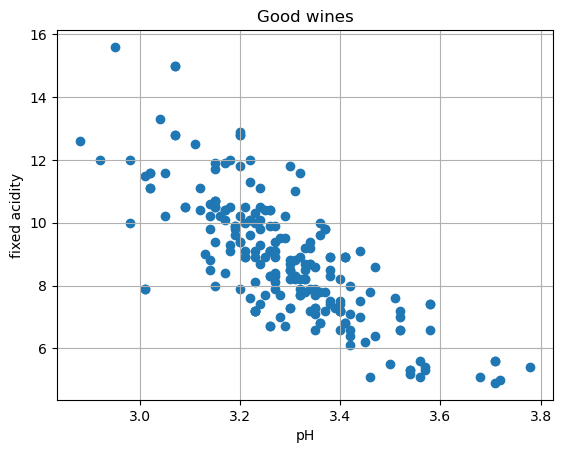

In [3]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 赤ワインデータをpandasのデータフレームに読み込む
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()
# 品質の良いものに絞る（"quality"の値が7以上）
df1 = df[df['quality'] > 6]
df1.head()
# 説明変数をpHの値に，目的変数を"fixed acidity"(不揮発酸濃度)の値にする
X = df1['pH'].values
Y = df1['fixed acidity'].values
# 赤ワインのpHと不揮発酸濃度の関係をグラフ（散布図）にする
plt.title('Good wines')
plt.scatter(X, Y)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

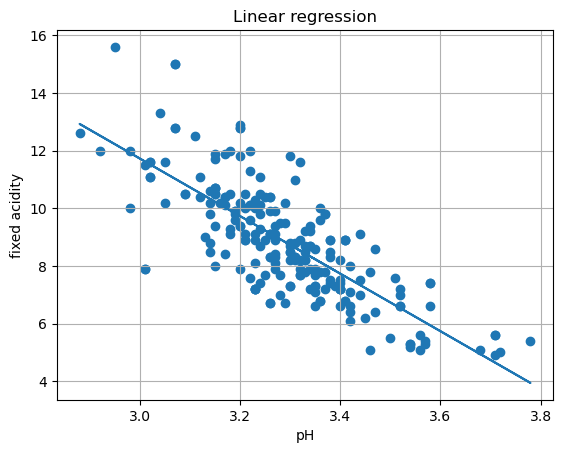

回帰係数=  [-9.985041]
切片=  41.685825856217654
決定係数=  0.5948141769596296


In [4]:
# scikit-learnを用いて線形単回帰分析を行う
clf = linear_model.LinearRegression()
X2 = [[x] for x in X]
clf.fit(X2, Y) # 予測モデルを作成

# 散布図
plt.scatter(X2, Y)

# 回帰直線
plt.title('Linear regression')
plt.plot(X2, clf.predict(X2))
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

print("回帰係数= ", clf.coef_)
print("切片= ", clf.intercept_)
print("決定係数= ", clf.score(X2, Y))

#### 例2：映画Rogue Oneのタイトル検索数（日本公開日の2016年12月16日から4週間分）のデータ（最も検索の多かった日を100とした相対数）
![image1.png](https://drive.google.com/uc?id=1-1vA22SfVsmvXVjABkE9Am_U9e2_Ti06)

この表をファイル"RogueOneSearchInterest28days.csv"として保存し，Dayの値を説明変数，Search Interest の値を目的変数として線形回帰分析を行う．

In [5]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 表をpandasのデータフレームに読み込む
dfex2 = pd.read_csv('RogueOneSearchInterest28days.csv', sep=',')
dfex2.head()

,Day,Search Interest
0,1,79
1,2,100
2,3,94
3,4,51
4,5,49


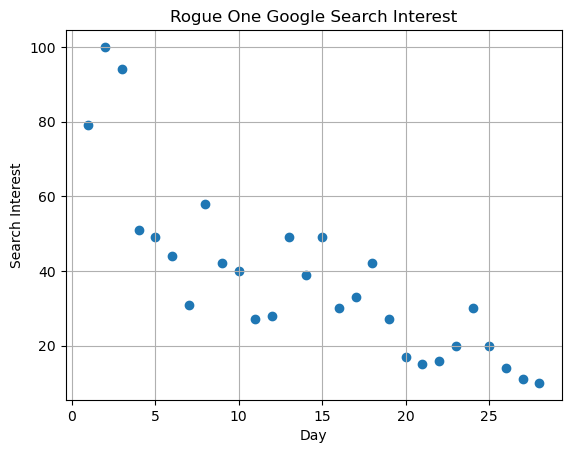

In [6]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 表をpandasのデータフレームに読み込む
dfex2 = pd.read_csv('RogueOneSearchInterest28days.csv', sep=',')
dfex2.head()
# 説明変数をDayの値に，目的変数をSearch Interestの値にする
X = dfex2['Day'].values
Y = dfex2['Search Interest'].values
# 経過日数と相対検索数の関係をグラフ（散布図）にする
plt.title('Rogue One Google Search Interest')
plt.scatter(X, Y)
plt.xlabel('Day')
plt.ylabel('Search Interest')
plt.grid()
plt.show()

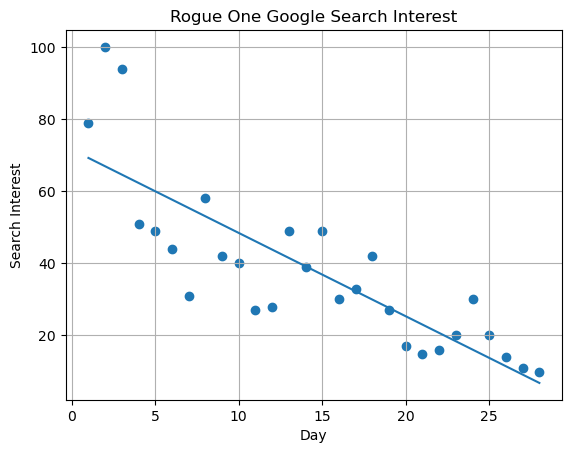

回帰係数=  [-2.31007115]
切片=  71.53174603174602
決定係数=  0.6770140607127098


In [7]:
# scikit-learnを用いて線形単回帰分析を行う
clf = linear_model.LinearRegression()
X2 = [[x] for x in X]
clf.fit(X2, Y) # 予測モデルを作成

# 散布図
plt.scatter(X2, Y)

# 回帰直線
plt.title('Rogue One Google Search Interest')
plt.plot(X2, clf.predict(X2))
plt.xlabel('Day')
plt.ylabel('Search Interest')
plt.grid()
plt.show()

print("回帰係数= ", clf.coef_)
print("切片= ", clf.intercept_)
print("決定係数= ", clf.score(X2, Y))

### 2.2 線形重回帰分析
- 複数の説明変数を持つ回帰分析を重回帰分析と呼ぶ．
- 以下のように複数の$X_i$（説明変数）や$a_i$（偏回帰係数）を持つ回帰式となる
$$
Y=a_1\times X_1+a_2\times X_2+ … +a_n\times X_n
$$

#### 例3：赤ワインのデータ(例8-1)
- 密度(density)と揮発酸（volatile acidity）とアルコール度数(alcohol)の関係を調べる
- x1に説明変数として密度(density)、x2に説明変数として揮発酸（volatile acidity）、yに目的変数としてアルコール度数(alcohol)として分析する

In [8]:
import pandas as pd

f = pd.read_csv('winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
x = df[['density', 'volatile acidity']]
y = df[['alcohol']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

print(x.shape)
print(y.shape)

(1599, 2)
(1599, 1)


C:\Users\murakawa\AppData\Local\Temp\ipykernel_14744\2229164247.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


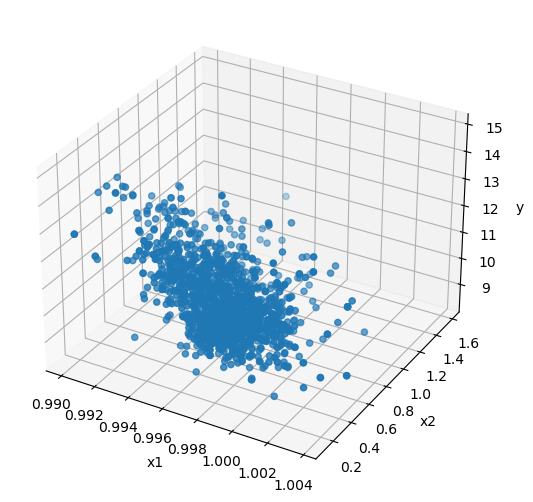

In [19]:
# 密度と揮発酸とアルコール度数の関係をグラフ（3D散布図）にする
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)
fig.add_axes(ax)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

In [11]:
# scikit-learnを用いて重回帰分析を行う
from sklearn.linear_model import LinearRegression
import numpy as np

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

C:\Users\murakawa\AppData\Local\Temp\ipykernel_14744\1098966359.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


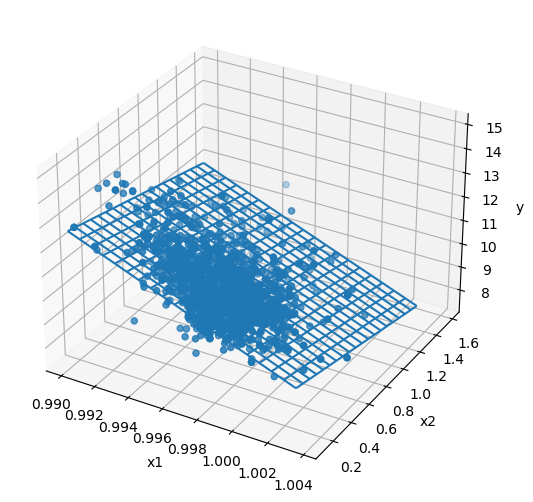

[[-277.78274856   -1.13941954]]
[287.90342428]
0.28283042699952965


In [20]:
# 分析結果をグラフにする
fig=plt.figure()
ax=Axes3D(fig)
fig.add_axes(ax)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(x, y))

#### 線形重回帰分析の注意事項
本講義では詳細の説明は省きますが，以下の項目について注意が必要となります．
- 多重共線性：２つの説明変数の間に強い相関関係があるときに起こることです．多重共線性が生じると，常識的に正の値になるはずの偏回帰係数が負の値になったり，負の値になると考えられる偏回帰係数が正の値になったりします．また，データの数を少し変えただけで偏回帰係数の値が大きく変動することもあり，回帰分析の結果が不安定になります．この問題を回避する方法の1つとして，事前に相関分析を行い，強い相関関係を持つ２つの説明変数のうちいずれかを除去するという方法があります．あるいは，以下の変数選択と呼ばれる統計的な方法で説明変数を自動的に選択することも可能です．
- 変数選択：以下に主な変数選択の方法を示します． 

|方法|仕組み|
|-|-|
|変数増加法|最初に，目的変数との関連性が最も高い説明変数を回帰式に入れる．その後，すでに回帰式に入っている説明変数との関係を考慮しながら，一定の基準に達するまで，目的変数との関連性が高い順に説明変数を入れていく．|
|変数減少法|最初に，すべての説明変数を回帰式に入れる．その後，他の説明変数との関係を考慮しながら，一定の基準に達するまで，目的変数との関連性が低い順に説明変数を除いていく．|
|変数増減法|増加法と減少法を組み合わせた方法，変数増加法と同じ基準で説明変数を1つずつ回帰式に入れつつ，変数減少法と同じ基準で削除すべき説明変数を除いていく．|

- 正規化：重回帰分析で、入力変数が複数になったことで重要なこととして、正規化の必要性が挙げられます。なぜ正規化が必要かというと、入力変数の単位（m, mm）や比べる対象（温度、密度）が異なり、そのままの数字を使うと、影響度合いをうまく評価できないからです。1mの変化と1mmの変化を同じ尺度で考えてはいけないのは、直感的にも分かると思います．これらの変数ごとの粒度を揃えるためのデータに対して行われる前処理が正規化(normalization)です。正規化の代表的な手法は以下2つです。
    - 標準化 (standardization)：平均、分散（標準偏差）を使ったもの（平均を0、分散を1にする）
    - Min-Maxスケーリング(min-max scaling)：最小値(min)、最大値(max)を使ったもの（全体を 0〜1にする）
    - 分野によっては「正規化=標準化」だったと定義が異なり紛らわしいですが、データを一定のルールに基づいて変形して、利用しやすくすることは全て正規化と呼ぶのが一般的なようです。
- 決定係数：実測値と回帰直線の誤差などに注目し，説明変数が目的変数をどのくらい説明しているかを表す指標．

#### 例4：標準化した値でScikit-learnを使った重回帰分析を行う

In [13]:
# scikit-learnのStandardScalerメソッドを使って，コマンド一発でいわゆる普通の分散を用いて標準化を行う
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

[[ 0.55827446  0.96187667]
 [ 0.02826077  1.96744245]
 [ 0.13426351  1.29706527]
 ...
 [-0.53355375 -0.09955388]
 [-0.67665745  0.65462046]
 [-0.66605717 -1.21684919]]
[[-0.96024611]
 [-0.58477711]
 [-0.58477711]
 ...
 [ 0.54162988]
 [-0.20930812]
 [ 0.54162988]]


In [14]:
# StandardScalerを使用して正規化したxss_sk, yss_sk を用いて重回帰分析を行う
model_lr_std = LinearRegression()
model_lr_std.fit(xss_sk, yss_sk)

print(model_lr_std.coef_)
print(model_lr_std.intercept_)
print(model_lr_std.score(xss_sk, yss_sk))

[[-0.49196281 -0.19145194]]
[-1.69468871e-14]
0.28283042699952965


偏回帰係数の差が、2.5倍程度と正規化無し（例4-3）のときと比べて小さくなっています。正規化してから求めた偏回帰係数のことを、標準化偏回帰係数と呼び回帰係数と区別します。また入力が正規化されているので切片model_lr.intercept_は（ほぼ）0となっています。1.1769986e-14と完全に0になっていないのはScikit-learnの計算上の都合です。ほとんど問題にならないですが、気になる場合はLinearRegression()にfit_intercept=Falseのオプションをつけて計算すると完全に0になります。一方、scoreに関しては、正規化しても変わりません。  
ここで、標準化偏回帰係数を用いて単純にxss_skを使ってyを計算（予測）すると、普通の回帰係数を用いて計算した結果と異なってしまい問題になります。  
この場合、正規化する前のモデルで逆変換して戻してあげる必要があります。scikit-learnには逆変換を行うinverse_transformがあるので、これを用いると簡単に変換できます。

In [15]:
sscaler.inverse_transform(model_lr_std.predict(xss_sk))

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])

#### 例5：min-maxスケーリングの値でScikit-learnを使った重回帰分析を行う

In [16]:
# scikit-learnを使ってmin-maxスケーリングを行う
mscaler = preprocessing.MinMaxScaler()
mscaler.fit(x)
xms = mscaler.transform(x)
mscaler.fit(y)
yms = mscaler.transform(y)

print(xms)
print(yms)

[[0.56754772 0.39726027]
 [0.49412628 0.52054795]
 [0.50881057 0.43835616]
 ...
 [0.41629956 0.26712329]
 [0.39647577 0.35958904]
 [0.3979442  0.13013699]]
[[0.15384615]
 [0.21538462]
 [0.21538462]
 ...
 [0.4       ]
 [0.27692308]
 [0.4       ]]


In [17]:
# min-maxスケーリングした値で重回帰分析を行う
model_lr_norm = LinearRegression()
model_lr_norm.fit(xms, yms)

print(model_lr_norm.coef_)
print(model_lr_norm.intercept_)
print(model_lr_norm.score(xms, yms))

[[-0.5820617  -0.25593116]]
[0.66805047]
0.2828304269995293


In [18]:
# 標準化の場合と同様に，yの値を予測するときには、逆変換をする必要があります
# min-maxスケーリングでも、標準化のときと同様inverse_transformを使って変換できます
mscaler.inverse_transform(model_lr_norm.predict(xms))

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])